<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [3]:
data = requests.get(url).text

Create a soup object


In [4]:
soup = BeautifulSoup(data, "html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
lang_salaries = []

tb = soup.find("table")
for row in tb.find_all("tr"):
    cols = row.find_all("td")
    lang_salaries.append(
        {"Language": cols[1].getText(), "Average Annual Salary":  cols[3].getText()}
    )

#skip the 1st row since it has headers
soup_df = pd.DataFrame(lang_salaries[1:]).set_index("Language")

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
table = pd.read_html(url, header=0)[0].set_index("Language")
table[["Average Annual Salary"]].to_csv("popular-languages.csv")

In [7]:
!pip install matplotlib

import matplotlib.pyplot as plt

In [16]:
# Read the CSV file
df = pd.read_csv('popular-languages.csv')

df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


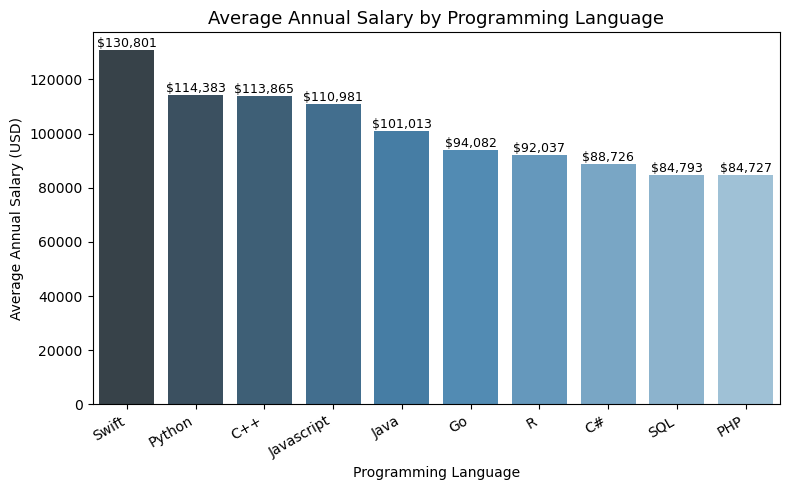

In [17]:
import seaborn as sns

# --- Clean salary column ---
df["Average Annual Salary"] = (
    df["Average Annual Salary"]
    .replace({'\$': '', ',': ''}, regex=True)
    .astype(float)
)

# --- Sort descending by salary ---
df_sorted = df.sort_values(by="Average Annual Salary", ascending=False)

# --- Plot bar chart ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_sorted,
    x="Language",
    y="Average Annual Salary",
    palette="Blues_d"
)

plt.title("Average Annual Salary by Programming Language", fontsize=13)
plt.xlabel("Programming Language")
plt.ylabel("Average Annual Salary (USD)")
plt.xticks(rotation=30, ha='right')

# --- Add labels above bars ---
for index, value in enumerate(df_sorted["Average Annual Salary"]):
    plt.text(index, value + 1000, f"${value:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
